<a href="https://colab.research.google.com/github/temple17/matplotlib-practice/blob/main/19_Bar_chart_with_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install matplotlib --upgrade

In [3]:
import numpy as np
import matplotlib.pyplot as plt

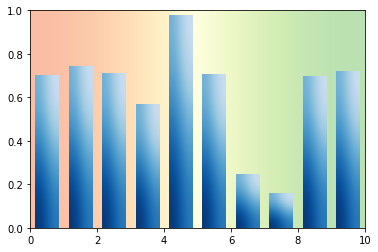

In [5]:
np.random.seed(19680801)

def gradient_image(ax, extent, direction=0.3, cmap_range=(0, 1), **kwargs):
    phi = direction * np.pi /2 
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0] , v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b-a) / X.max() * X
    im = ax.imshow(X, extent = extent, interpolation='bicubic',
                   vmin = 0, vmax=1, **kwargs)
    return im

def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent = (left, right, bottom, top), 
                       cmap = plt.cm.Blues_r, cmap_range=(0, 0.8))

xmin, xmax = xlim = 0, 10
ymin, ymax = ylim = 0, 1

fig, ax = plt.subplots()
ax.set(xlim=xlim, ylim=ylim, autoscale_on=False)

# background image
gradient_image(ax, direction=1, extent = (0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.RdYlGn, cmap_range=(0.2, 0.8), alpha=0.5)

N = 10
x = np.arange(N) + 0.15
y = np.random.rand(N)
gradient_bar(ax, x, y, width=0.7)
ax.set_aspect('auto')